## Cosimulación

### Carga de librerías

In [1]:
# Librerías
%reset -f
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from NLO_subsystems import mass_yF_uS, mass_yS_uF
from NLO_properties import sys
from CosimManager import JacobiManagerSR
from IPython import display

### Parámetros

In [2]:
# Masa
m1 = 1.0
m2 = 1.0

# Rigidez
k1 = 10.0
k2 = 1000.0
kc = 100.0

# Amortiguamiento
c1 = 0
c2 = 0
cc = 0

# Condiciones iniciales
s10 = 0
s20 = 0
s1d0 = 100
s2d0 = -100

In [3]:
# Crea un sys con todos los parámetros
properties = sys(m1, m2, k1, k2, kc, c1, c2, cc, s10, s1d0, s20, s2d0)

### Esquema de coupling

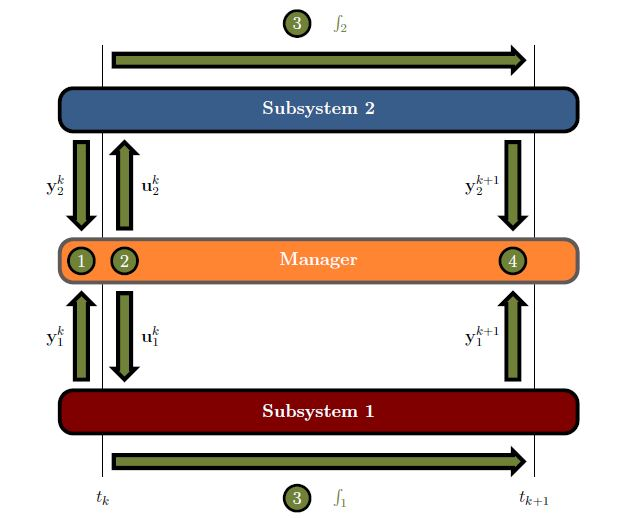

In [4]:
# Jacobi
display.Image("./Jacobi.jpg")

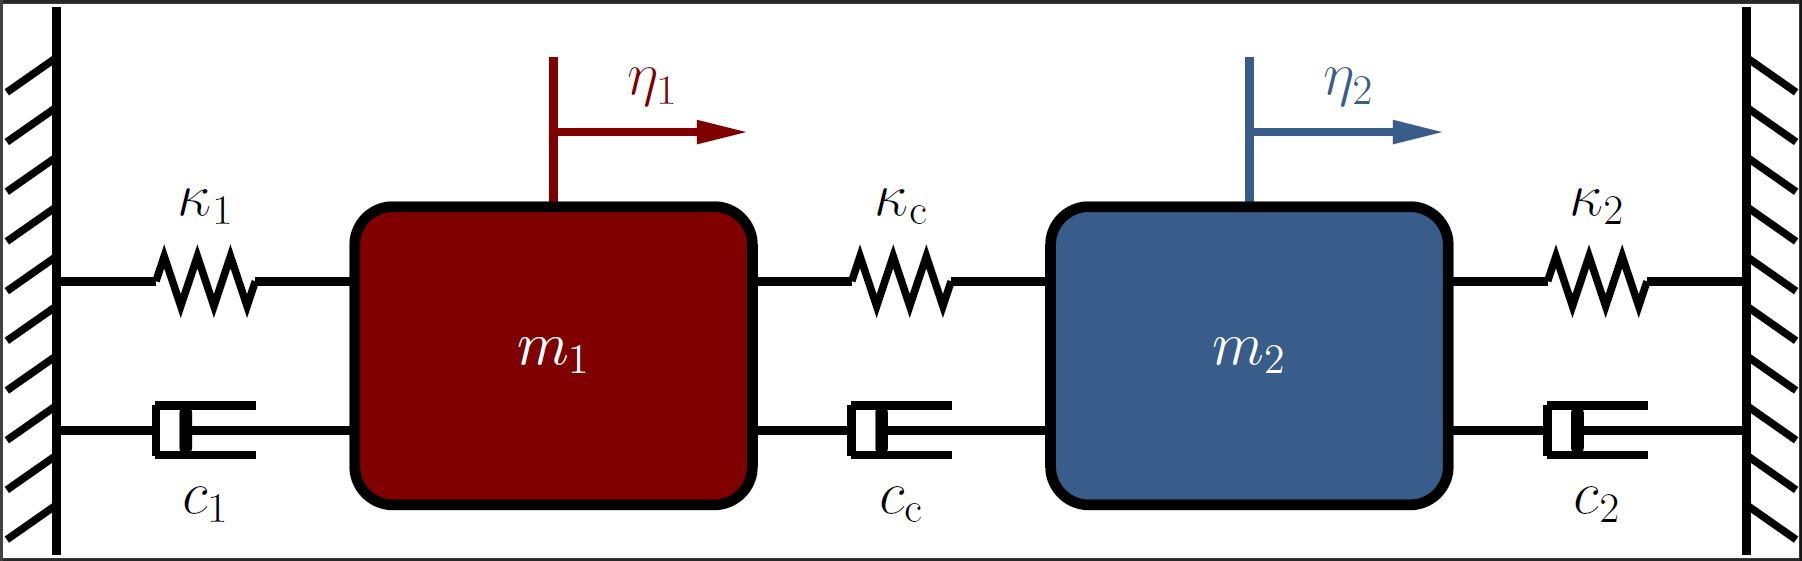

In [5]:
# Oscilador de 2 masas
display.Image("./LinearOscillator.jpg")

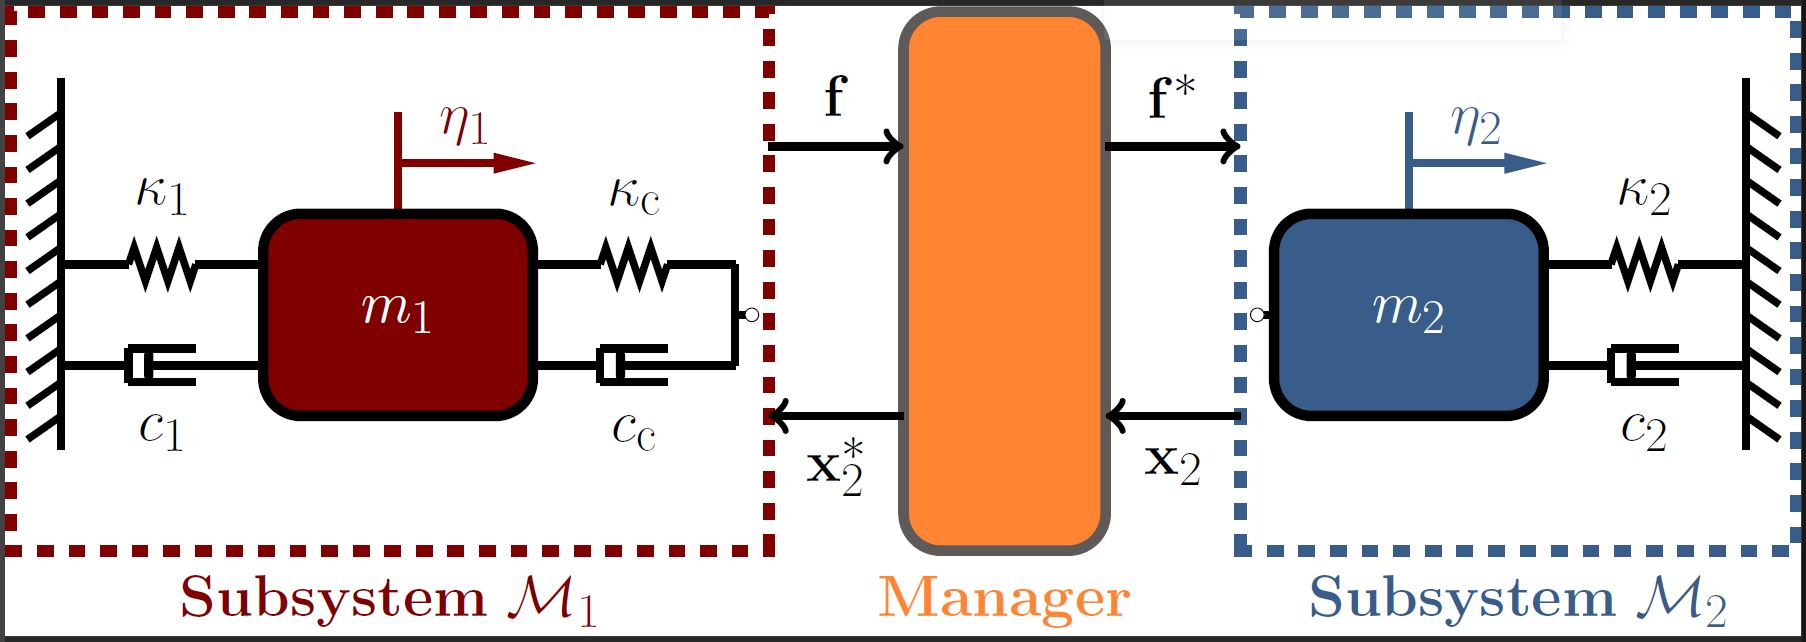

In [6]:
# Sistema cosimulado
display.Image("./LinearOscillatorCosim.jpg")

### Pasos de tiempo

In [4]:
# Pasos de tiempo
h1 = 1e-3
h2 = 1e-3
dt1 = 1e-3
dt2 = 1e-3
H = 1e-3

# Tiempo de simulación
tEnd = 10.0

### Solución de referencia

In [12]:
# Solución calculada con una co-simulación con paso de tiempo muy bajo. No hay solución analítica
# Instancias de ambos sistemas
ss1 = mass_yF_uS('SS1', properties, 1)
ss2 = mass_yS_uF('SS2', properties, 2)

# Manager single-rate
manager = JacobiManagerSR(properties, 1e-6, 1e-6, 1e-6, tEnd)

# Assigning subsystems
manager.assignSS1(ss1)
manager.assignSS2(ss2)

# Inicialización
y10, y20 = manager.initialize()
print('Initial solution: ')
print('Fc: ', -y10[0])
print('s2: ', y20[0])
print('s2d: ', y20[1])

# Loop
manager.run()

# Soluciones
ref_t, ref_fc, ref_s1, ref_s1d, ref_s1dd, ref_s2, ref_s2d, ref_s2dd, ref_T, ref_V, ref_E, ref_u = manager.getSTORE()

# Terminación
manager.terminate()

SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  0.001 s
Macro time:  0.002 s
Macro time:  0.003 s
Macro time:  0.004 s
Macro time:  0.005 s
Macro time:  0.006 s
Macro time:  0.007 s
Macro time:  0.008 s
Macro time:  0.009 s
Macro time:  0.01 s
Macro time:  0.011 s
Macro time:  0.012 s
Macro time:  0.013 s
Macro time:  0.014 s
Macro time:  0.015 s
Macro time:  0.016 s
Macro time:  0.017 s
Macro time:  0.018 s
Macro time:  0.019 s
Macro time:  0.02 s
Macro time:  0.021 s
Macro time:  0.022 s
Macro time:  0.023 s
Macro time:  0.024 s
Macro time:  0.025 s
Macro time:  0.026 s
Macro time:  0.027 s
Macro time:  0.028 s
Macro time:  0.029 s
Macro time:  0.03 s
Macro time:  0.031 s
Macro time:  0.032 s
Macro time:  0.033 s
Macro time:  0.034 s
Macro time:  0.035 s
Macro time:  0.036 s
Macro time:  0.037 s
Macro time:  0.038 s
Macr

### Solución cosimulada

In [6]:
# Instancias de ambos sistemas
ss1 = mass_yF_uS('SS1', properties, 1)
ss2 = mass_yS_uF('SS2', properties, 2)

# Manager single-rate
manager = JacobiManagerSR(properties, H, h1, h2, tEnd)

# Assigning subsystems
manager.assignSS1(ss1)
manager.assignSS2(ss2)

# Inicialización
y10, y20 = manager.initialize()
print('Initial solution: ')
print('Fc: ', -y10[0])
print('s2: ', y20[0])
print('s2d: ', y20[1])

# Loop
manager.run()

# Soluciones
cosim_t, cosim_fc, cosim_s1, cosim_s1d, cosim_s1dd, cosim_s2, cosim_s2d, cosim_s2dd, cosim_T, cosim_V, cosim_E, cosim_u = manager.getSTORE()

# Terminación
manager.terminate()

SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


In [13]:
# Solución cosimulada
dataframe = pd.DataFrame()
dataframe['Time'] = cosim_t
dataframe['s1*'] = cosim_s1
dataframe['s1d*'] = cosim_s1d
dataframe['s1dd*'] = cosim_s1dd
dataframe['s2*'] = cosim_s2
dataframe['s2d*'] = cosim_s2d
dataframe['s2dd*'] = cosim_s2dd
dataframe['f*'] = cosim_fc
dataframe['E*'] = cosim_E

# Solución analítica
dataframe['s1_ref'] = ref_s1[0::1000]
dataframe['s1d_ref'] = ref_s1d[0::1000]
dataframe['s1dd_ref'] = ref_s1dd[0::1000]
dataframe['s2_ref'] = ref_s2[0::1000]
dataframe['s2d_ref'] = ref_s2d[0::1000]
dataframe['s2dd_ref'] = ref_s2dd[0::1000]
dataframe['f_ref'] = ref_fc[0::1000]
dataframe['E_ref'] = ref_E[0::1000]

print(f'Rows: { dataframe.shape[0]} , Columns: {dataframe.shape[1]}')
dataframe.head()

Rows: 10001 , Columns: 17


,Time,s1*,s1d*,s1dd*,s2*,s2d*,s2dd*,f*,E*,s1_ref,s1d_ref,s1dd_ref,s2_ref,s2d_ref,s2dd_ref,f_ref,E_ref
0,0.000,0.000000,100.000000,0.000000,0.000000,-100.000000,0.000000,-0.000000,10000.000000,0.000000,100.000000,0.000000,0.000000,-100.000000,0.000000,-0.000000,10000.000000
1,0.001,0.100000,100.000000,0.000000,-0.100000,-100.000000,0.000000,-31.622777,10027.255518,0.099987,99.968106,-47.847325,-0.099904,-99.759627,360.593406,-44.698015,10000.022850
2,0.002,0.199952,99.952116,-47.883637,-0.199652,-99.652149,347.850543,-54.767884,10037.397741,0.199928,99.909777,-67.651247,-0.199456,-99.320115,509.666687,-63.188942,10000.032078
3,0.003,0.299837,99.884431,-67.685860,-0.298803,-99.150557,501.592402,-70.674514,10044.728666,0.299801,99.834279,-82.811630,-0.298501,-98.751468,623.592594,-77.343587,10000.039010
4,0.004,0.399638,99.801583,-82.847515,-0.397336,-98.533254,617.303005,-83.572773,10050.668445,0.399592,99.744933,-95.557154,-0.396924,-98.078852,719.171957,-89.242205,10000.044700


In [8]:
# Guardar dataset
#dataframe.to_csv(path_or_buf = 'cosim_noDis.csv', index = False)

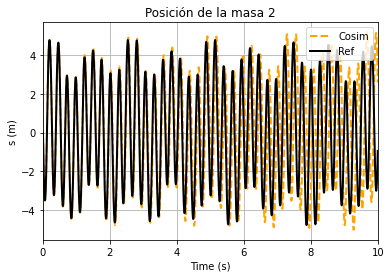

In [14]:
# Posiciones
plt.plot(dataframe['Time'], dataframe['s2*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['s2_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Posición de la masa 2')
plt.ylabel('s (m)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

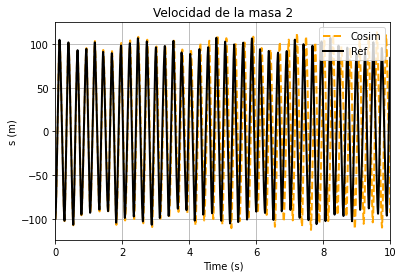

In [17]:
# Velocidades
plt.plot(dataframe['Time'], dataframe['s2d*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['s2d_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Velocidad de la masa 2')
plt.ylabel('s (m)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

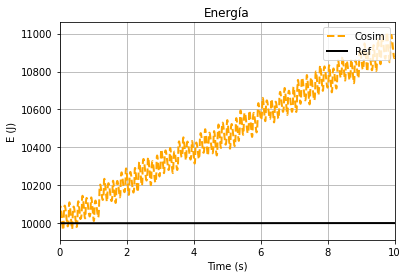

In [15]:
# Energía
plt.plot(dataframe['Time'], dataframe['E*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['E_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Energía')
plt.ylabel('E (J)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

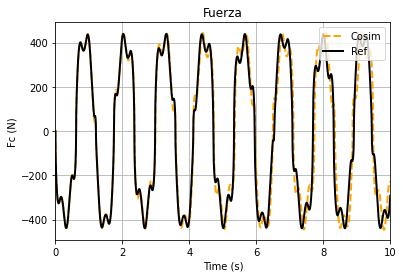

In [16]:
# Input fuerza
plt.plot(dataframe['Time'], dataframe['f*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['f_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Fuerza')
plt.ylabel('Fc (N)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

### Cálculo coeficientes estimador

In [19]:
# Primero se calcula X donde se almacenan la fuerza actual y del paso anterior [1 f_actual f_anterior]
X = np.ones((10000, 3))
X[:, 1] = dataframe['f*'][1:]
X[:, 2] = dataframe['f*'][0:10000]
X


array([[   1.        ,  -31.6227766 ,   -0.        ],
       [   1.        ,  -54.76788442,  -31.6227766 ],
       [   1.        ,  -70.67451424,  -54.76788442],
       ...,
       [   1.        , -232.21273268, -231.87375744],
       [   1.        , -232.57690649, -232.21273268],
       [   1.        , -232.96556801, -232.57690649]])

In [20]:
# Se guardan las fuerzas de la solución de referencia para el paso actual [f_actual ref]
y = np.zeros((10000,))
y = dataframe['f_ref'][1:]
y

1        -44.698015
2        -63.188942
3        -77.343587
4        -89.242205
5        -99.690398
            ...    
9996    -303.600107
9997    -300.815245
9998    -297.975507
9999    -295.080049
10000   -292.127998
Name: f_ref, Length: 10000, dtype: float64

In [21]:
# Los coeficientes se calculan como theta = (X' * X)^-1 (X' * Y)
theta = np.matmul(X.transpose(), X)
theta = np.matmul(np.matmul(np.linalg.pinv(theta), X.transpose()), y)
theta

array([-1.82623658,  8.73085324, -7.75775918])

In [29]:
# Se lanzan varias iteraciones de la cosimulación, donde se van actuaizando los coeficientes 
# para cada iteración según las fuerzas de acoplamiento que salen.
# Es necesario limitar la corrección del estimador para que no se inestabilice la dinámica

def loop(theta, lim, ite):
    
    for _ in range(0, ite):

        # Instancias de ambos sistemas
        ss1 = mass_yF_uS('SS1', properties, 1)
        ss2 = mass_yS_uF('SS2', properties, 2)

        # Manager single-rate
        manager = JacobiManagerSR(properties, H, h1, h2, tEnd)

        # Assigning subsystems
        manager.assignSS1(ss1)
        manager.assignSS2(ss2)

        # Correction
        manager.correctionCoeffs(theta, lim) # Se introduce el nuevo estimador y el límite de corrección

        # Inicialización
        y10, y20 = manager.initialize()
        print('Initial solution: ')
        print('Fc: ', -y10[0])
        print('s2: ', y20[0])
        print('s2d: ', y20[1])

        # Loop
        manager.run()

        # Soluciones
        cosim_t, cosim_fc, cosim_s1, cosim_s1d, cosim_s1dd, cosim_s2, cosim_s2d, cosim_s2dd, cosim_T, cosim_V, cosim_E, cosim_u = manager.getSTORE()

        # Terminación
        manager.terminate()

        # Solución cosimulada
        dataframe = pd.DataFrame()
        dataframe['Time'] = cosim_t
        dataframe['s1*'] = cosim_s1
        dataframe['s1d*'] = cosim_s1d
        dataframe['s1dd*'] = cosim_s1dd
        dataframe['s2*'] = cosim_s2
        dataframe['s2d*'] = cosim_s2d
        dataframe['s2dd*'] = cosim_s2dd
        dataframe['f*'] = cosim_fc
        dataframe['E*'] = cosim_E

        # Solución analítica
        dataframe['s1_ref'] = ref_s1[0::1000]
        dataframe['s1d_ref'] = ref_s1d[0::1000]
        dataframe['s1dd_ref'] = ref_s1dd[0::1000]
        dataframe['s2_ref'] = ref_s2[0::1000]
        dataframe['s2d_ref'] = ref_s2d[0::1000]
        dataframe['s2dd_ref'] = ref_s2dd[0::1000]
        dataframe['f_ref'] = ref_fc[0::1000]
        dataframe['E_ref'] = ref_E[0::1000]

        # Posiciones
        plt.plot(dataframe['Time'], dataframe['s2*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['s2_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Posición de la masa 2')
        plt.ylabel('s (m)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Velocidades
        plt.plot(dataframe['Time'], dataframe['s2d*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['s2d_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Velocidad de la masa 2')
        plt.ylabel('sd (m/s)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Fuerza
        plt.plot(dataframe['Time'], dataframe['f*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['f_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Fuerza')
        plt.ylabel('Fc (N)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Corr', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Energía
        plt.plot(dataframe['Time'], dataframe['E*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['E_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Energía')
        plt.ylabel('E (J)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Errores
        #print('Error en energía: ', np.sqrt((dataframe['E*'] * dataframe['E_ref']).sum()) / np.sqrt(10001))
        #print('Error en posición: ', np.sqrt((dataframe['s2*'] * dataframe['s2_ref']).sum()) / np.sqrt(10001))
        #print('Error en velocidad: ', np.sqrt((dataframe['s2d*'] * dataframe['s2d_ref']).sum()) / np.sqrt(10001))
        print('Estimador usado: ', theta)

        # Evaluar theta
        X = np.ones((10000, 3))
        X[:, 1] = dataframe['f*'][1:]
        X[:, 2] = dataframe['f*'][0:10000]

        y = np.zeros((10000,))
        y = dataframe['f_ref'][1:]

        theta = np.matmul(X.transpose(), X)
        theta = np.matmul(np.matmul(np.linalg.pinv(theta), X.transpose()), y)

    return dataframe
    
    

SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


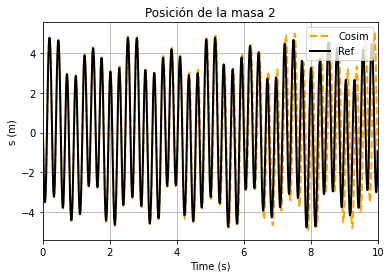

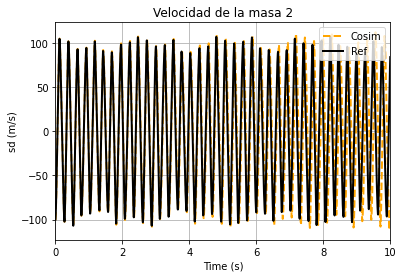

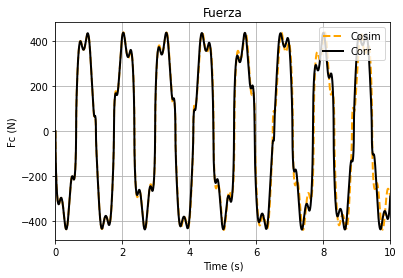

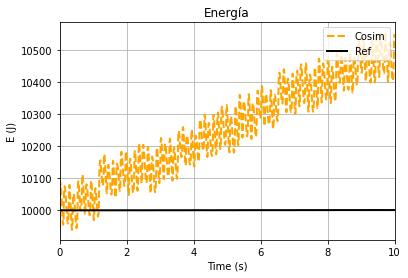

Estimador usado:  [-1.82623658  8.73085324 -7.75775918]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


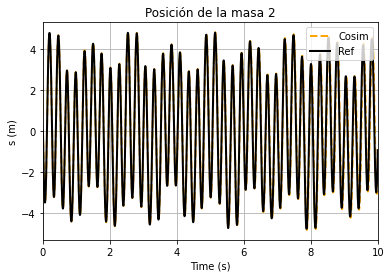

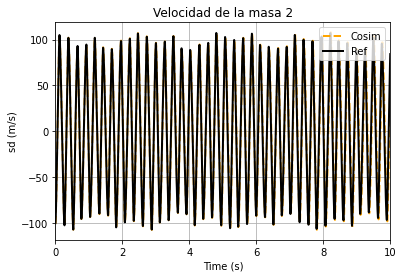

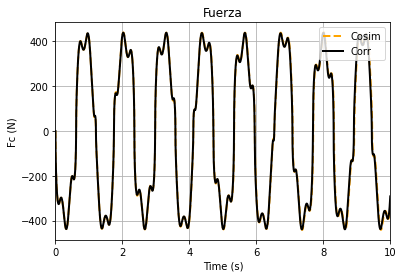

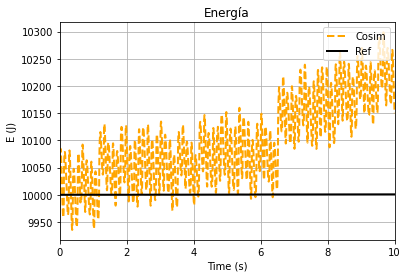

Estimador usado:  [-1.10832755  6.70482666 -5.71242755]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


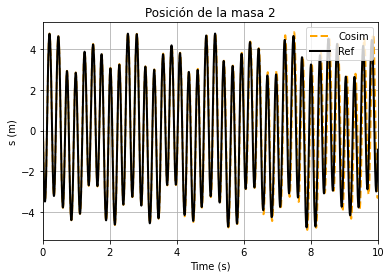

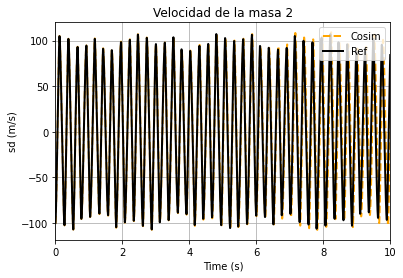

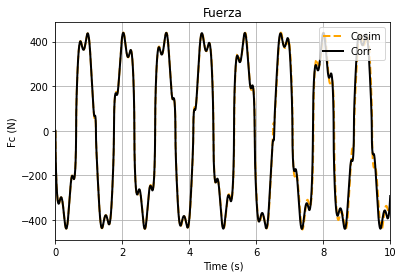

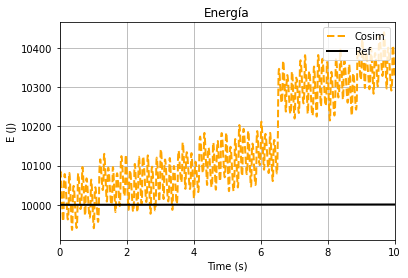

Estimador usado:  [-0.39866922  4.51151032 -3.51637699]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


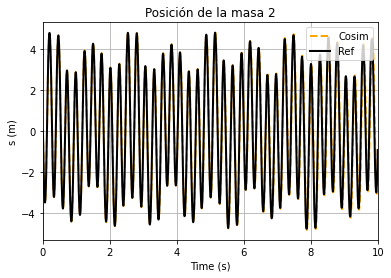

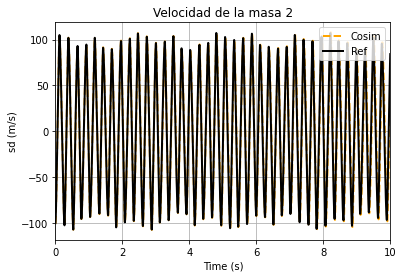

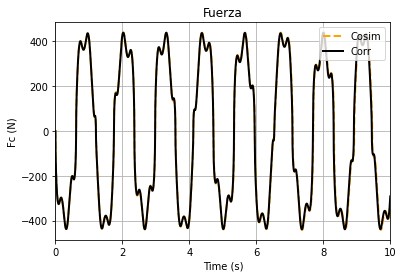

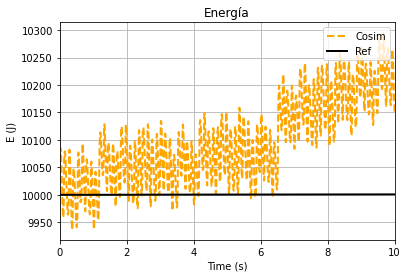

Estimador usado:  [-0.74801069  5.22819834 -4.23325059]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


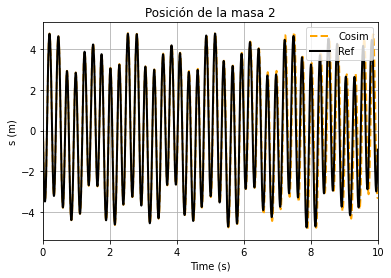

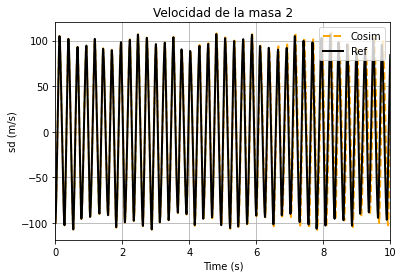

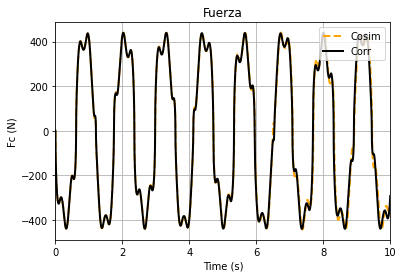

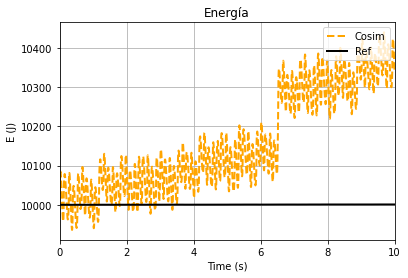

Estimador usado:  [-0.39921365  4.50163228 -3.506488  ]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


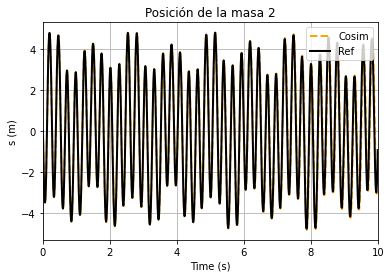

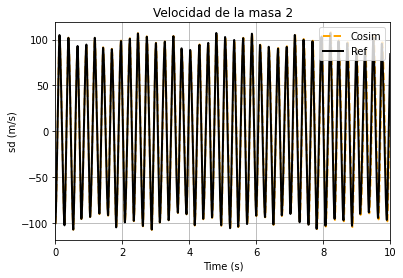

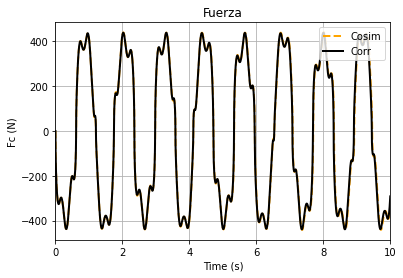

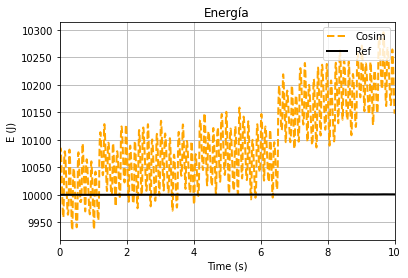

Estimador usado:  [-0.75219878  5.23884059 -4.24392431]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


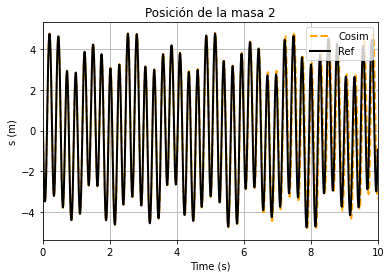

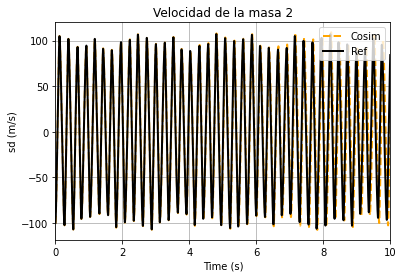

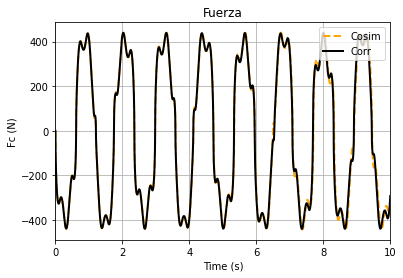

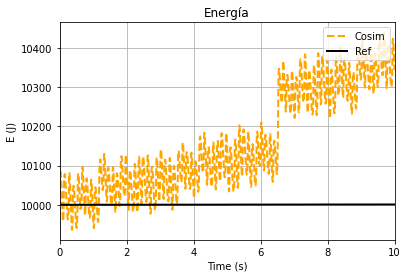

Estimador usado:  [-0.39935249  4.5023235  -3.50718111]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


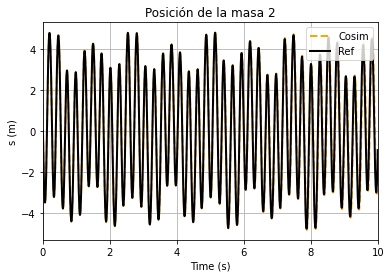

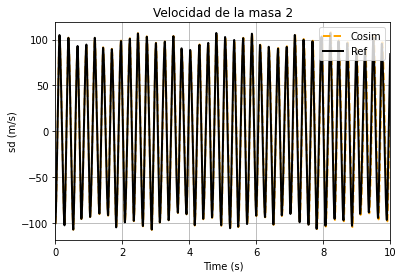

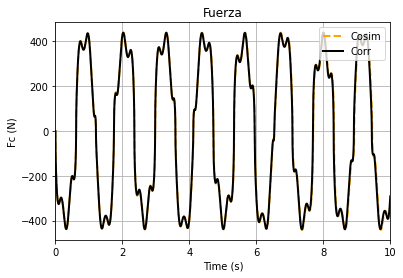

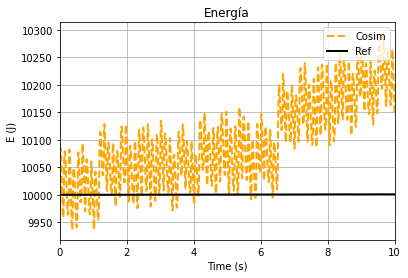

Estimador usado:  [-0.75364746  5.24191492 -4.24701273]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


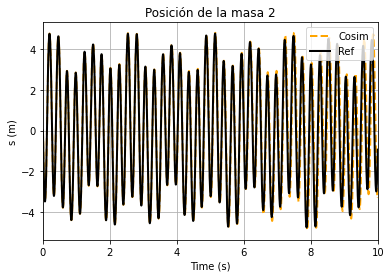

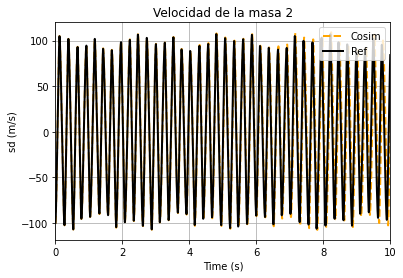

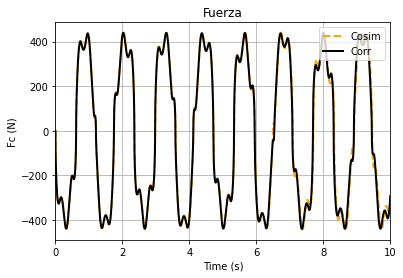

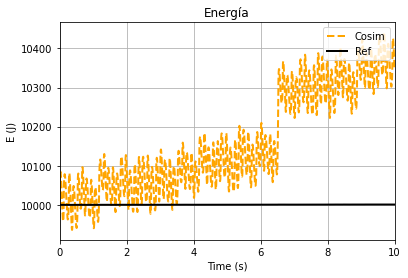

Estimador usado:  [-0.39945002  4.50279489 -3.50765389]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -0.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


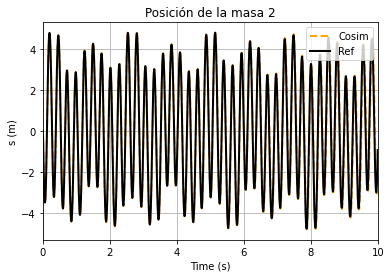

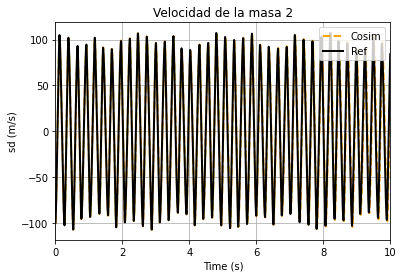

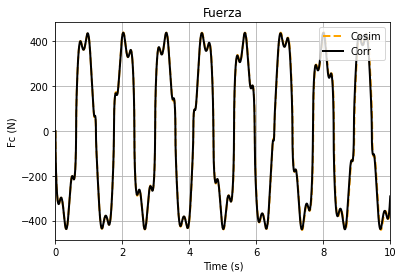

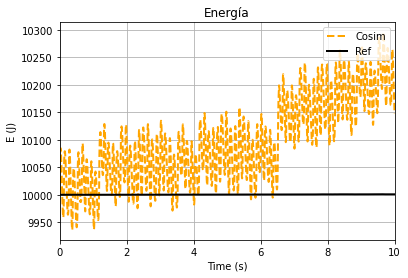

Estimador usado:  [-0.75523371  5.24560622 -4.25071625]


In [33]:
df = loop(theta, 2, 10) # No deja corregir la fuerza más allá de 2N o empieza a desestabilizarse

In [24]:
# Guardar dataset
df.to_csv(path_or_buf = 'lo_noDis.csv', index = False)

df2 = pd.read_csv('lo_noDis.csv', skiprows=lambda x: (x-1)%10 != 0, header=None)
df2.to_csv(path_or_buf = 'lo_noDis.csv', index = False)